In [407]:
import pandas as pd
import numpy as np
import re
import plotly.graph_objects as go
import pandas as pd
import nltk
import textblob
import plotly.express as px
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.tokenize import TweetTokenizer
from string import punctuation
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from sklearn.cluster import MiniBatchKMeans
from textblob import TextBlob

import seaborn as sns

import plotly
plotly.offline.init_notebook_mode (connected = True)


nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


[nltk_data] Downloading package vader_lexicon to C:\Users\Prachi
[nltk_data]     Gopalani\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [408]:
data =  pd.read_csv("vaccination_tweets.csv").fillna('')

In [409]:
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [410]:
data.shape

(5852, 16)

In [411]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5852 entries, 0 to 5851
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                5852 non-null   int64 
 1   user_name         5852 non-null   object
 2   user_location     5852 non-null   object
 3   user_description  5852 non-null   object
 4   user_created      5852 non-null   object
 5   user_followers    5852 non-null   int64 
 6   user_friends      5852 non-null   int64 
 7   user_favourites   5852 non-null   int64 
 8   user_verified     5852 non-null   bool  
 9   date              5852 non-null   object
 10  text              5852 non-null   object
 11  hashtags          5852 non-null   object
 12  source            5852 non-null   object
 13  retweets          5852 non-null   int64 
 14  favorites         5852 non-null   int64 
 15  is_retweet        5852 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 651.6+ KB


In [412]:
hist=px.histogram(data_frame=data,x='date',color='user_verified',marginal="rug")
hist.update_xaxes(showgrid=False)
hist.update_yaxes(showgrid=False)
hist.show()

# Data Cleaning

In [413]:
stop_words = (set(stopwords.words('english')))
sno = SnowballStemmer('english')

def remove_html_tags(sentence):
    regex = re.compile(pattern='<.*?>')
    clean_text = re.sub(regex, ' ', sentence)
    return clean_text

def remove_punctuations(word):
    cleaned_sentence = re.sub(pattern=r'[?|!|\|"|#|\']', repl=r'', string=word)
    cleaned_sentence = re.sub(pattern=r'[.|,|)|(|\|/]', repl=r'', string=cleaned_sentence)
    return cleaned_sentence

def get_preprocessed_data(data, feature, cleaned_feature):
        
        i = 0
        final_string = []

        sentences = data[feature].values
        for sentence in sentences:
            filtered_sentence = []
            sentence = remove_html_tags(sentence)
            for word in sentence.split():
                for clean_word in remove_punctuations(word).split():
                    if clean_word.isalpha() and len(clean_word) > 2:
                        if clean_word.lower() not in stop_words:
                            s = (sno.stem(clean_word.lower()))
                            filtered_sentence.append(s)

            string = " ".join(filtered_sentence)
            final_string.append(string)
            i += 1
        data[cleaned_feature] = final_string
        return data

data = get_preprocessed_data(data, 'text', 'Tidy Tweet')
data = get_preprocessed_data(data, 'hashtags', 'Tidy hashtags')

In [414]:
data.shape

(5852, 18)

# TOP 100 Commonly used words

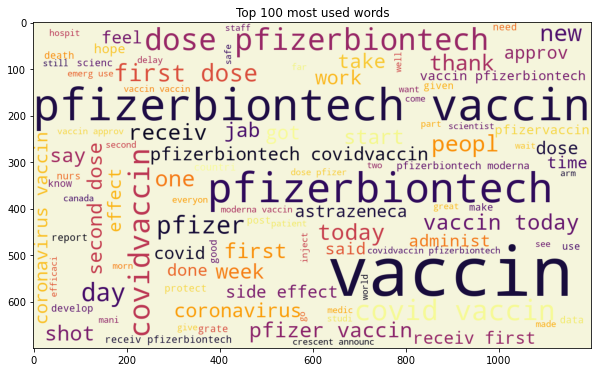

In [415]:
clean_data = "".join(data['Tidy Tweet'].values)
word_cloud = WordCloud(width=1200,height=700,
                       background_color='beige',colormap='inferno',
                       max_words=100).generate(clean_data)

plt.figure(figsize=[10,15])
plt.title("Top 100 most used words")
plt.imshow(word_cloud)
plt.show()

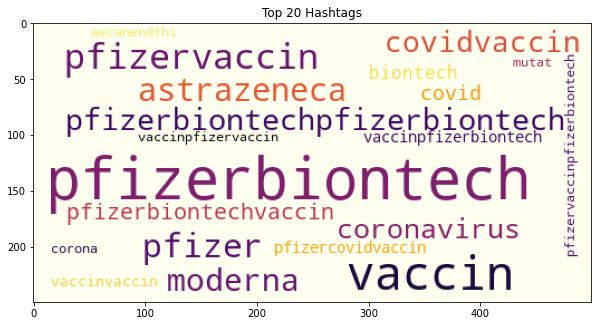

In [416]:
clean_hashtag = "".join(data['Tidy hashtags'])
word_cloud = WordCloud(width=500,height=250,
                       background_color='ivory',colormap='inferno',
                       max_words=20).generate(clean_hashtag)

plt.figure(figsize=[10,15])
plt.imshow(word_cloud)
plt.title("Top 20 Hashtags")
plt.show()

Text(0.5, 1.0, 'Percentage of Verified Users')

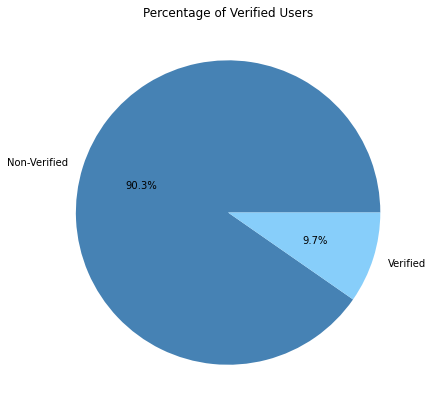

In [417]:
a = pd.DataFrame(data['user_verified'].value_counts())
plt.figure(figsize=(7,7))
plt.pie(a['user_verified'],
        labels=['Non-Verified','Verified'],
        autopct='%1.1f%%',
        colors=['steelblue','lightskyblue'])
plt.title("Percentage of Verified Users")

# Conclusion¶
#'Vaccine', 'covid', 'vaccination', 'people' & 'first' are the most commonly used words in the Tweets
#Top hashtags are 'PfizerBioNTech', 'COVID19' & 'CovidVaccine'
#It is observed that 9.9% of the Tweets are from Verified Users of Twitter

# Sentiment Analysis

Neutral     3160
Positive    1788
Negative     904
Name: Sentiment, dtype: int64


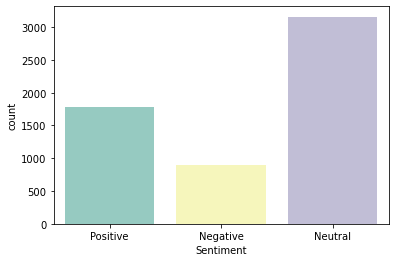

In [434]:
sentiment = SentimentIntensityAnalyzer()

def get_sentiment(data):
    sentiment_list = []
    for text in list(data['Tidy Tweet'].values):
        if sentiment.polarity_scores(text)["compound"] > 0:
            sentiment_list.append("Positive")
        elif sentiment.polarity_scores(text)["compound"] < 0:
            sentiment_list.append("Negative")
        else:
            sentiment_list.append("Neutral")
    return sentiment_list
        
data['Sentiment'] = get_sentiment(data)
sns.countplot(x="Sentiment", data=data, palette="Set3")
print(data.Sentiment.value_counts())

In [419]:
def get_word_cloud(sentiment):
    stop_words = (set(stopwords.words('english')))
    remove_words = ['vaccin', 'pfizerbiontech', 'coronavirus', 'pfizer', 'covid', 'covidvaccin', 'pfizervaccin','vaccine']
    stop_words = remove_words + list(stop_words)
    plt.figure(figsize=[15,15])
    clean_tweets= "".join(list(data[data['Sentiment']==sentiment]['Tidy Tweet'].values))
    wordcloud = WordCloud(width=700,height=400, background_color='white',colormap='plasma', max_words=50, stopwords=stop_words, collocations=False).generate(clean_tweets)
    plt.title(f"Top 50 {sentiment} words used in tweets", fontsize=20)
    plt.imshow(wordcloud)
    return plt.show()

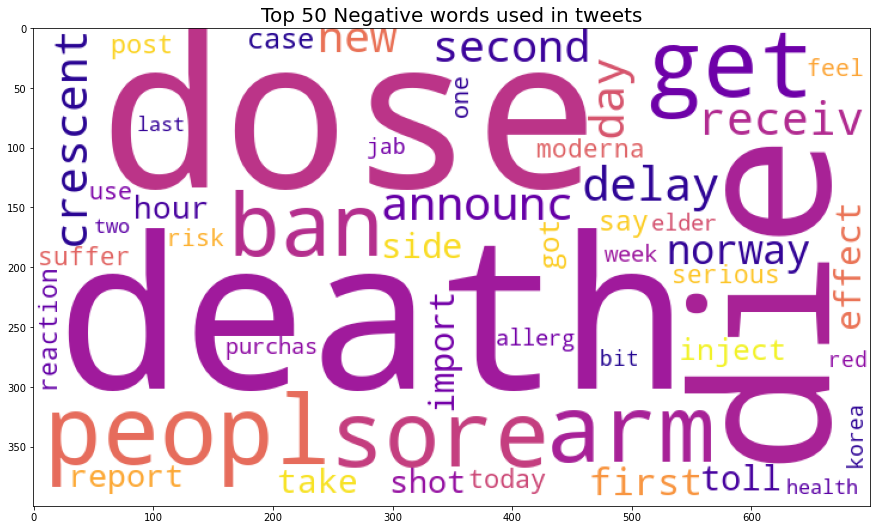

In [420]:
get_word_cloud(sentiment='Negative')

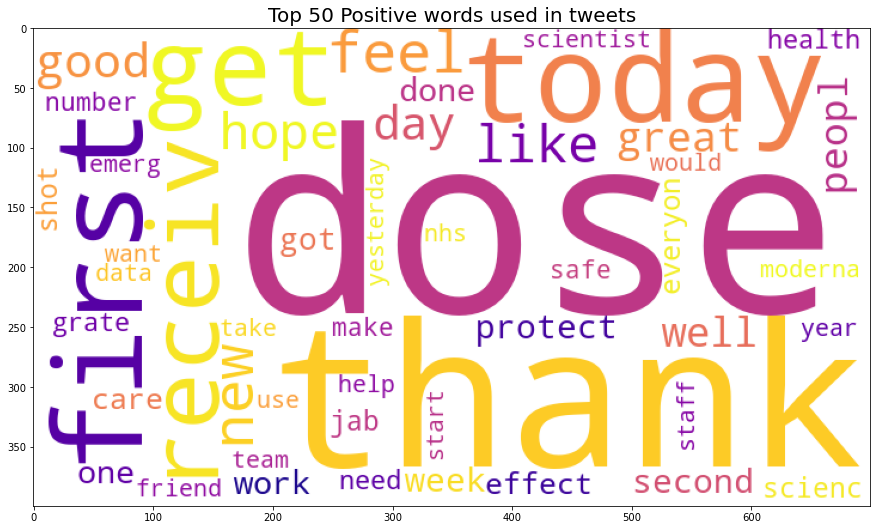

In [421]:
get_word_cloud(sentiment='Positive')

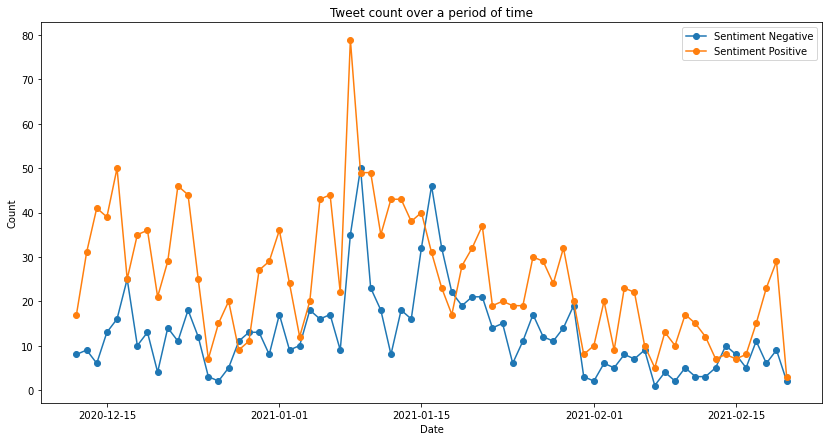

In [422]:
data['date'] = pd.to_datetime(data['date']).dt.date
negative_data = data[data['Sentiment']=='Negative'].reset_index()
positive_data = data[data['Sentiment']=='Positive'].reset_index()
grouped_data_neg = negative_data.groupby('date')['Sentiment'].count().reset_index()
grouped_data_pos = positive_data.groupby('date')['Sentiment'].count().reset_index()
merged_data = pd.merge(grouped_data_neg, grouped_data_pos, left_on='date', right_on='date', suffixes=(' Negative', ' Positive'))

merged_data.plot(x='date', y=['Sentiment Negative', 'Sentiment Positive'], figsize=(14, 7), marker='o', xlabel='Date', ylabel='Count', title='Tweet count over a period of time')

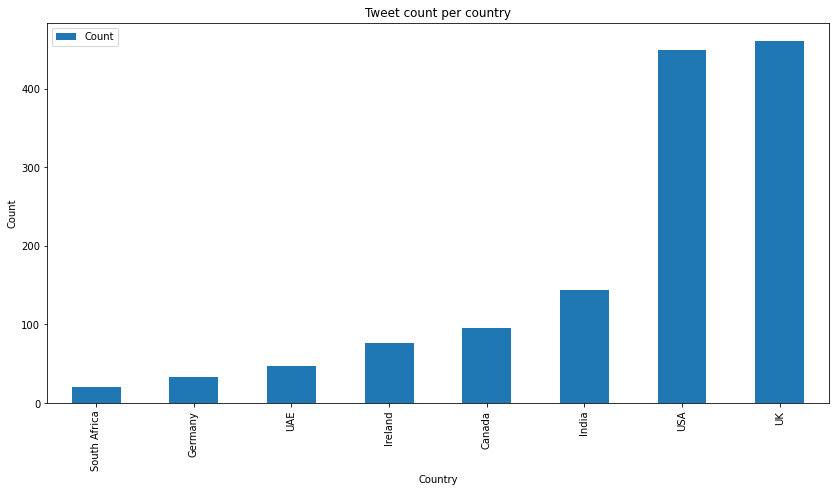

In [423]:
loc_df = data['user_location'].str.split(',',expand=True)
loc_df=loc_df.rename(columns={0:'fst_loc',1:'snd_loc'})
loc_df['snd_loc'] = loc_df['snd_loc'].str.strip()

state_fix = {'Ontario': 'Canada','United Arab Emirates': 'UAE','TX': 'USA','NY': 'USA','FL': 'USA','England': 'UK','Watford': 'UK','GA': 'USA','IL': 'USA', 'NY':'USA','United Kingdom':'UK', 
             'Alberta': 'Canada','WA': 'USA','NC': 'USA','British Columbia': 'Canada','MA': 'USA','ON':'Canada','OH':'USA','MO':'USA','AZ':'USA','NJ':'USA','London':'UK',
             'CA':'USA','DC':'USA','AB':'USA','PA':'USA','SC':'USA','VA':'USA','TN':'USA','New York':'USA','Dubai':'UAE','CO':'USA', 'MI':'USA', 'LA':'USA', 'MD':"USA"}
country = loc_df.replace({"snd_loc": state_fix}) 
top_tweets = loc_df['snd_loc'].value_counts()[:20]
tweet_df = pd.DataFrame(top_tweets)
tweet_df.reset_index(level=0, inplace=True)
tweet_df.columns = ['Country', 'Count']
tweet_df['Country'] = tweet_df['Country'].replace(state_fix, regex=False)
tweets_per_country = tweet_df.groupby('Country')['Count'].sum().reset_index().sort_values(by='Count')
tweets_per_country.plot.bar(x='Country', figsize=(14, 7), xlabel='Country', ylabel='Count', title='Tweet count per country')

# TextBlob

In [429]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity
data['Polarity'] = data['Tidy Tweet'].apply(get_polarity)

NEUTRAL     3564
POSITIVE    1784
NEGATIVE     504
Name: Sentiment_Type, dtype: int64


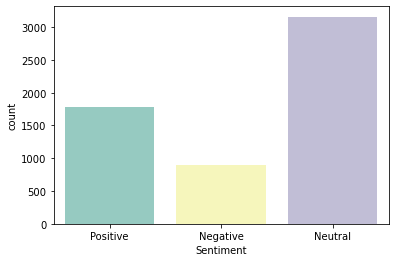

In [436]:
data['Sentiment_Type']=''
data.loc[data.Polarity>0,'Sentiment_Type']='POSITIVE'
data.loc[data.Polarity==0,'Sentiment_Type']='NEUTRAL'
data.loc[data.Polarity<0,'Sentiment_Type']='NEGATIVE'
#data.Sentiment_Type.value_counts().plot(kind='bar',title="Sentiment Analysis",palette='Set3')

sns.countplot(x="Sentiment", data=data, palette="Set3")

print(data.Sentiment_Type.value_counts())